Задание: 

Сгенерируйте выборку состоящую из суммы двух нормальных распредеоений с различными средними, но одинаковыми дисперсиями. Оцените ее медиану и размах.

Оцените выборочную дисперсию и математическое ожидание.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def gen_raspr(m1,m2,sig, num = 1000):
    s1 = np.random.normal(m1, sig, num)
    s2 = np.random.normal(m2, sig, num)
    return [s1,s2]

In [3]:
def draw_all(s1,s2,sh = 0.5):
    fig, ax = plt.subplots()
    s =  np.concatenate((s1, s2))
    bbb = np.arange(min(s), max(s), sh)
    ax.hist(s, bins = bbb  ,  alpha = 0.3, label = 's1 + s2')
    ax.hist(s1, bins = bbb, alpha = 0.3, label = 's1')
    ax.hist(s2, bins = bbb ,  alpha = 0.3 , label = 's2')
    fig.set_figwidth(12)
    fig.set_figheight(6)
    plt.legend()
    plt.show()

In [4]:
def get_metrics(s):
    med = np.median(s)
    razm = max(s) - min(s)
    return [med, razm]

In [5]:
def work(m1 = 10, m2 = -10, d = 10, num = 10000, dr = False):
    s1,s2 = gen_raspr(m1,m2,d,num)
    if dr:
        draw_all(s1,s2, sh = 1)
    s = np.concatenate((s1, s2))
    norm.cdf(s)
    return get_metrics(s), [m1 + m2, 2*(d**2)], [np.mean(s), np.var(s)]

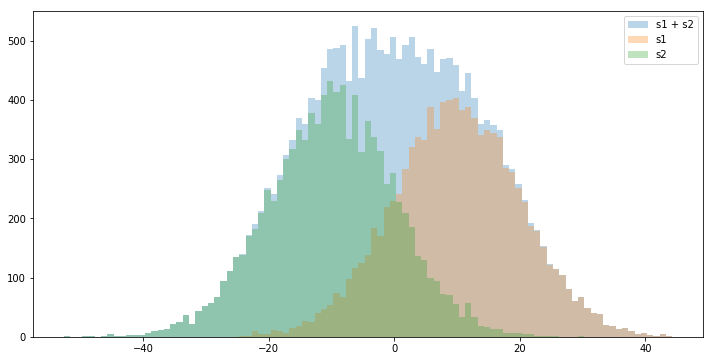

Медиана:  -0.08547085166236279
Размах:  97.63175252818269
Теоретичесое матожидание/среднее выборки:  0 / -0.017525927186070475
Теоретическая дисперсия/дисперсия выборки:  200 / 200.77063709114952


In [6]:
rez, teor, pract = work(dr = True, num = 10000,)
print("Медиана: ", rez[0])
print("Размах: ", rez[1])
print('Теоретичесое матожидание/среднее выборки: ', teor[0], '/', pract[0])
print('Теоретическая дисперсия/дисперсия выборки: ', teor[1], '/', pract[1])

In [7]:
def get_stats(dr = False, d = 10):
    steps0 = np.arange(50,90,10)
    steps1 = np.arange(100,900,100)
    steps2 = np.arange(1000,15000,1000)
    steps = np.concatenate((steps0, steps1, steps2))
    dm = []
    dd = []
    draz = []
    dmed = []
    for i in steps:
        rez, teor, pract = work(num = int(i),dr = False, d = d)
        dm.append(abs(teor[0] - pract[0]))
        dd.append(abs(teor[1] - pract[1]))
        draz.append(rez[1])
        dmed.append(abs(rez[0]))
    if dr:
        fig, ax = plt.subplots()
        ax.plot(steps, dm)
        ax.plot(steps, dd)
        fig.set_figwidth(16)
        fig.set_figheight(6)
        plt.show()
    return dm, dd, steps, draz, dmed

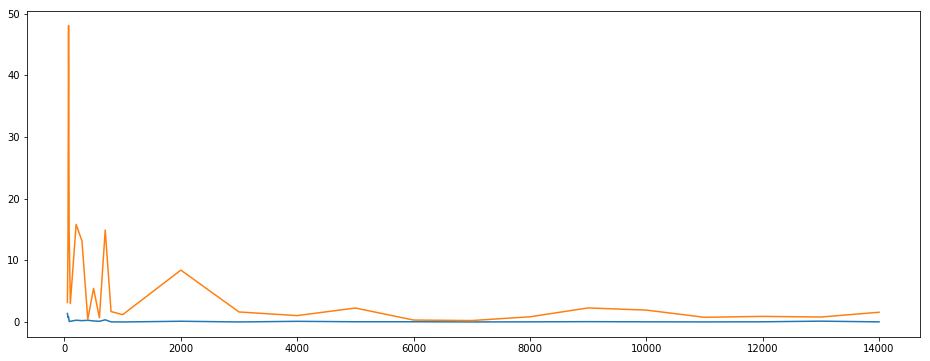

In [8]:
i = get_stats(True)

По оси абцисс кол-во эл-ов в выборке, по оси ординат отклонение (МАЕ) от теоретического значения.

Оранжевым показана дисперсия, синим матожидание.

Но здесь ничего не понятно, т.к. для каждого кол-ва эл-ов в выборке, генерировалась одна выборка, исправим это, каждое кол-ао элементов в выборке будем генерировать по 100 раз.

In [9]:
dm, dd, steps, draz, dmed = get_stats()
sdm = np.array([dm])
sdd = np.array([dd])
sdraz = np.array([draz])
sdmed = np.array([dmed])
for i in range(100):
    dm, dd, steps, draz, dmed = get_stats()
    sdm = np.concatenate((sdm,np.array([dm])))
    sdd = np.concatenate((sdd,np.array([dd])))
    sdraz = np.concatenate((sdraz,np.array([draz])))
    sdmed = np.concatenate((sdmed,np.array([dmed])))

In [10]:
srdm = np.mean(sdm, axis = 0)
srdd = np.mean(sdd, axis = 0)
srdraz = np.mean(sdraz, axis = 0)
srdmed = np.mean(sdmed, axis = 0)
h = 3

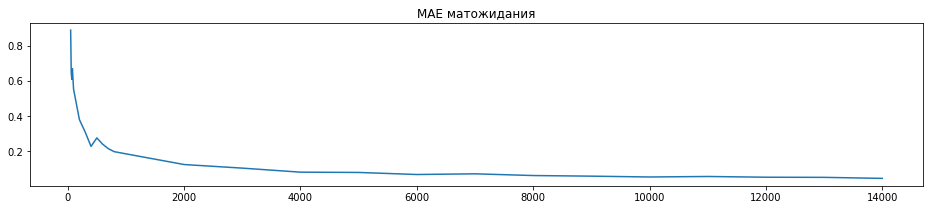

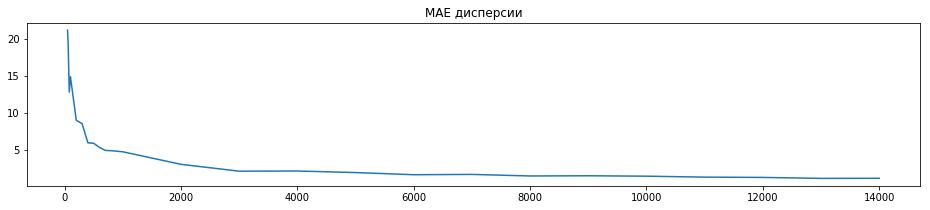

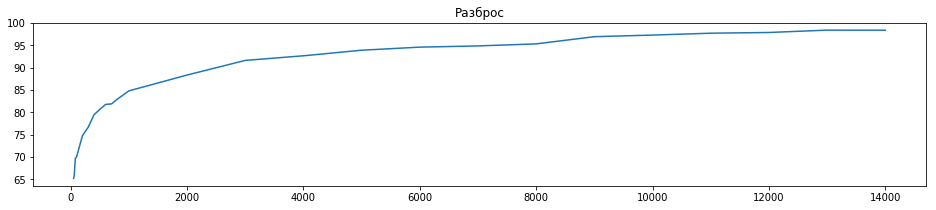

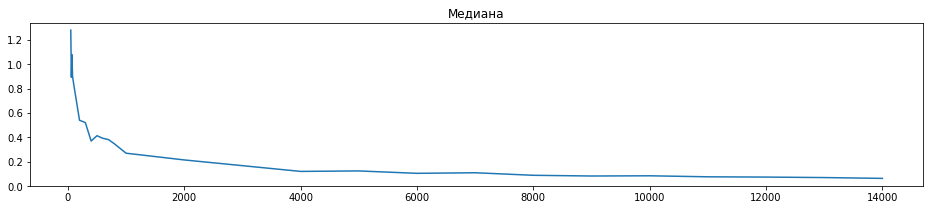

In [11]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
ax1.plot(steps, srdm)
ax2.plot(steps, srdd)
ax3.plot(steps, srdraz)
ax4.plot(steps, srdmed)
fig1.set_figwidth(16)
fig1.set_figheight(h)
ax1.title.set_text('MAE матожидания')
fig2.set_figwidth(16)
fig2.set_figheight(h)
ax2.title.set_text('МАЕ дисперсии')
fig3.set_figwidth(16)
fig3.set_figheight(h)
ax3.title.set_text('Разброс')
fig4.set_figwidth(16)
fig4.set_figheight(h)
ax4.title.set_text('Медиана')
plt.show()